<a href="https://colab.research.google.com/github/roy-sub/Machine-Learning-Bootcamp/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

In [ ]:
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

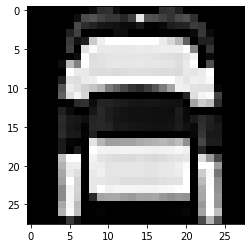

Pullover


In [ ]:
# Images : Data which made up of many Pixels(Picture Elements)
import matplotlib.pyplot as plt
img =125
plt.imshow(x_train[img],cmap='gray')
plt.show()
print(class_names[y_train[img]])


# https://github.com/zalandoresearch/fashion-mnist

In [ ]:
len(np.unique(y_train))

10

In [ ]:
#0 to 255  = Pixel Range
28*28

784

In [ ]:
x_train[104]

array([[  0,   0,   0,   0,   0,   0,   2,   2,   2,   2,   0,   0,  48,
        150, 255, 206,  61,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  88, 120,
        182,  77,  59, 118, 126,  10,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,  10,  48,  64, 110,  85,
         99, 118,  88,  99,  69, 115, 120,  26,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,  59, 153, 161, 115,  77,  72,
         77,  99,  88,  99,  99,  85,  93, 142, 104,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,  93,  72, 104,  37,  51,  37,
         93, 123, 112, 139, 107,  45,  48,  59, 136,  48,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,  40, 139,  88, 147, 104,  77,  88,
         91, 128, 110,  80,  93,  80, 102,  99, 118, 102,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# Opencv - Computer Vision Library for Python
# Grayscale = [Height*Width] = (w,h)
# Color = [Height*Width*Depth] =(w,h,3) 
# Depth = 3(RGB)

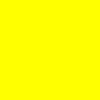

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
a = np.ones([100,100,3],dtype = 'uint8')*255
a[:,:] = [0,255,255]  # BGR
#print(a)
cv2_imshow(a)

In [ ]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
# Building my Neural Network
# 1 Layer D-NN

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(300,activation ='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 5,validation_split=0.2)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 13.2997 - accuracy: 0.7137
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6008 - accuracy: 0.7907
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5316 - accuracy: 0.8138
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5155 - accuracy: 0.8210
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4852 - accuracy: 0.8332


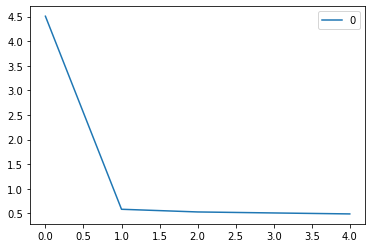

In [ ]:
import pandas as pd
pd.DataFrame(history.history['loss']).plot()

In [ ]:
y_pred = model.predict_classes(x_test)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)

array([[820,   0,  11,  46,   0,   0, 175,   0,   2,   0],
       [  6, 959,   2,  17,   2,   0,   2,   0,   1,   0],
       [ 29,   3, 766,  29, 106,   0, 188,   0,  11,   0],
       [ 49,  29,  25, 820,  23,   5,  63,   1,  18,   0],
       [  7,   6, 173,  69, 827,   0, 148,   0,   6,   0],
       [  1,   0,   0,   0,   0, 852,   0,   8,   2,   2],
       [ 74,   1,  21,  18,  41,   0, 405,   0,   6,   0],
       [  0,   0,   0,   0,   0,  50,   0, 849,   4,  10],
       [ 14,   2,   2,   1,   1,   6,  19,   0, 950,   1],
       [  0,   0,   0,   0,   0,  87,   0, 142,   0, 987]])

In [ ]:
accuracy_score(y_pred,y_test)

0.8235

In [ ]:
# Save the model

model.save("fashion.hdf5")